In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataOriginal = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')
dataOriginal.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Question 1
The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

## Part1
Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [3]:
data1 = dataOriginal.copy()

In [4]:
data1 = data1[data1['Country Code'] == 1]
data1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


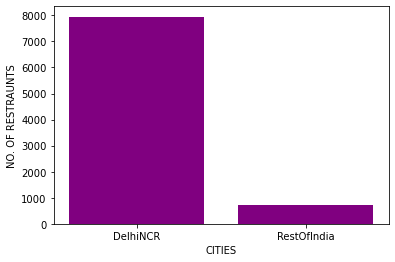

In [5]:
delhiNCR = ['New Delhi', 'Ghaziabad', 'Noida', 'Gurgaon', 'Faridabad']
comparison = {'DelhiNCR' : 0, 'RestOfIndia' : 0}
for city in data1['City']:
    if city in delhiNCR:
        comparison['DelhiNCR'] += 1
    else:
        comparison['RestOfIndia'] += 1
groups = []
restraunts = []
for key, value in comparison.items():
    groups.append(key)
    restraunts.append(value)
plt.bar(groups, restraunts, color = 'purple')
plt.xlabel('CITIES')
plt.ylabel('NO. OF RESTRAUNTS')
plt.show()

## Part 2
Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [6]:
data2 = dataOriginal.copy()

In [7]:
for i in range(len(data2)):
    if data2.loc[i]['City'] in delhiNCR:
        data2.loc[i,'City'] = "DelhiNCR"

In [8]:
data2 = data2[data2['Country Code'] == 1]
data2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [9]:
IndiaCuisines = set()
DelhiCuisines = set()

for i in range(len(data2)):
    if data2.iloc[i]['City'] == 'DelhiNCR':
        DelhiCuisines.add(data2.iloc[i]['Cuisines'].split(",")[0])
    else:
        IndiaCuisines.add(data2.iloc[i]['Cuisines'].split(",")[0])

In [10]:
cuisinesNotInDelhiNCR = []
for cuisine in IndiaCuisines:
    if cuisine in DelhiCuisines:
        continue
    else:
        cuisinesNotInDelhiNCR.append(cuisine)

In [11]:
import requests
from requests.auth import HTTPBasicAuth
import json

In [12]:
#userkey = 627c28c07ad221c65491bbffea6f5d54
req = requests.get('https://developers.zomato.com/api/v2.1/cuisines',
                   params = {'user-key' : '627c28c07ad221c65491bbffea6f5d54', 'city_id' : 1},
                   headers = {'Accept' : 'application/json', 'user-key' : '627c28c07ad221c65491bbffea6f5d54'})
res = req.json()

In [13]:
result = False
for item in res['cuisines']:
    if item['cuisine']['cuisine_name'] not in cuisinesNotInDelhiNCR:
        result = True
        break
print(*cuisinesNotInDelhiNCR)
print(result)

Andhra Indian Charcoal Grill Tex-Mex Malwani
True


## Part3
Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [14]:
data3 = dataOriginal.copy()

In [15]:
data3 = data3[data3['Country Code'] == 1]
data3.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


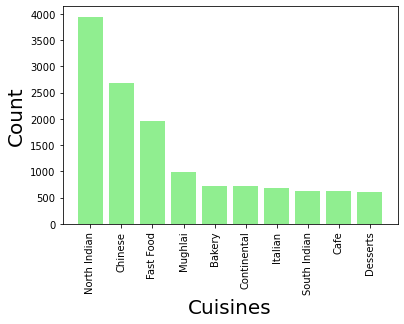

In [16]:
cuisineCount = {}
def ocuurence(cuisines):
    listCuisines = cuisines.strip().split(",")
    for cuisine in listCuisines:
        cuisineCount[cuisine.strip()] = cuisineCount.get(cuisine.strip(),0)+1
        

        
data3['Cuisines'].apply(ocuurence)
cuisineNameCount = []
for key, value in cuisineCount.items():
    cuisineNameCount.append([value, key])
cuisineNameCount.sort(reverse = True)


cuisineName = []
cuisineCount1 = []
for item in cuisineNameCount[:10]:
    cuisineName.append(item[1])
    cuisineCount1.append(item[0])
    
plt.bar(cuisineName, cuisineCount1, color = "lightgreen")
plt.xticks(rotation = 90)
plt.xlabel("Cuisines",size = 20)
plt.ylabel("Count", size = 20)
plt.show()

## Part 4
Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.


In [17]:
data4 = dataOriginal.copy()

In [18]:
 for i in range(len(data4)):
        if data4.loc[i]['City'] in delhiNCR:
            data4.loc[i,'City'] = "DelhiNCR"
        else:
            data4.loc[i,'City'] = "RestOfIndia"

In [19]:
data4 = data4[data4['Country Code'] == 1]
data4.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,RestOfIndia,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,RestOfIndia,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,RestOfIndia,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,RestOfIndia,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,RestOfIndia,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [20]:
data4['CityCuisines'] = data4['City'] + "#" + data4['Cuisines']

delhiNCRCuisineWithcount = {}
restOfIndiaCuisineWithcount = {}

def cityCuisineWithCount(cityCuisine):
    cityName = cityCuisine.split("#")[0]
    cuisineName = cityCuisine.split("#")[1].split(",")
    if cityName == "DelhiNCR":
        for cuisine in cuisineName:
            delhiNCRCuisineWithcount[cuisine.strip()] = delhiNCRCuisineWithcount.get(cuisine.strip(), 0) + 1
    else:
        for cuisine in cuisineName:
            restOfIndiaCuisineWithcount[cuisine.strip()] = restOfIndiaCuisineWithcount.get(cuisine.strip(), 0) + 1
    
data4['CityCuisines'].apply(cityCuisineWithCount)

cuisineInDelhiNCR = len(delhiNCRCuisineWithcount)
cuisineInRestOfIndia = len(restOfIndiaCuisineWithcount)

print("DelhiNCR ", cuisineInDelhiNCR)
print("RestOfIndia ", cuisineInRestOfIndia)

DelhiNCR  86
RestOfIndia  70


In [21]:
cuisineWithCountDelhiNCR = []
cuisineWithCountREstOfIndia = []

for key, value in delhiNCRCuisineWithcount.items():
    cuisineWithCountDelhiNCR.append([value, key])
for key, value in restOfIndiaCuisineWithcount.items():
    cuisineWithCountREstOfIndia.append([value, key])
    
cuisineWithCountDelhiNCR.sort(reverse = True)
cuisineWithCountREstOfIndia.sort(reverse = True)



In [22]:
cuisineDelhiNCR = []
countDelhiNCR = []
cuisineRestOfIndia = []
countRestOfIndia = []

for item in cuisineWithCountDelhiNCR[:15]:
    cuisineDelhiNCR.append(item[1])
    countDelhiNCR.append(item[0])
    
for item in cuisineWithCountREstOfIndia[:15]:
    cuisineRestOfIndia.append(item[1])
    countRestOfIndia.append(item[0])

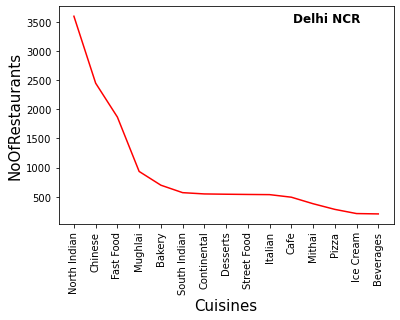

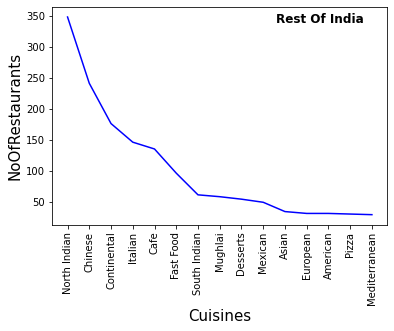

In [23]:
plt.plot(cuisineDelhiNCR, countDelhiNCR, color = 'red')
plt.xticks(rotation = 90)
plt.xlabel("Cuisines", size = 15)
plt.ylabel("NoOfRestaurants", size = 15)
plt.title("Delhi NCR", x=0.8, y=0.9, fontweight="bold")
plt.show()

plt.plot(cuisineRestOfIndia, countRestOfIndia, color = 'blue')
plt.xticks(rotation = 90)
plt.xlabel("Cuisines", size = 15)
plt.ylabel("NoOfRestaurants", size = 15)
plt.title("Rest Of India", x=0.8, y=0.9, fontweight="bold")
plt.show()

## Conclusion
By observing above graph we can infer that the "North Indian" and "Chinese" cuisines is the most popular cuisines among the restaurants of Delhi NCR and Rest of India.

Beside this, In Delhi NCR "Fast Food" cuisine is way too popular having 1866 restaurants and In Rest of India "Continental" and "Italian" cuisines are so much polpular having 177 and 147 retaurants|.

